# Prepare Data

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, Dropout , Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import glob
import cv2
import keras
import tensorflow as tf




import warnings
warnings.filterwarnings('ignore')

In [7]:
X_train = []
y_train = []
for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append(1)


for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append(2)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_train.append(n)
    y_train.append(3)

In [8]:
X_test = []
y_test = []
for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/EOSINOPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append(0)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/LYMPHOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append(1)


for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/MONOCYTE/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append(2)

for img in glob.glob("/content/drive/MyDrive/datasets3/dataset2-master/dataset2-master/images/TEST_SIMPLE/NEUTROPHIL/*.jpeg"):
    n = cv2.imread(img)
    n = cv2.resize(n, (64,64), interpolation = cv2.INTER_AREA)
    X_test.append(n)
    y_test.append(3)


In [10]:
X_train = np.array(X_train)/255
X_test = np.array(X_test)/255
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D


# bulding model

In [22]:
model = Sequential()
model.add(Conv2D(32, 3, input_shape=(64,64,3) , activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(64, 3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
# optimizer = tf.keras.optimizers.Adam(0.00001)

model.compile(loss='sparse_categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [23]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 6, 6, 128)       

# Split data into Train and Validation

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# train the Model

In [24]:
history = model.fit( X_train, y_train, epochs = 100, verbose=1 ,  validation_data=(X_valid, y_valid)  )

Epoch 1/100
265/265 [==============================] - 3s 8ms/step - loss: 1.3884 - accuracy: 0.2494 - val_loss: 1.3861 - val_accuracy: 0.2550
Epoch 2/100
265/265 [==============================] - 3s 10ms/step - loss: 1.3876 - accuracy: 0.2484 - val_loss: 1.3862 - val_accuracy: 0.2477
Epoch 3/100
265/265 [==============================] - 3s 11ms/step - loss: 1.3867 - accuracy: 0.2592 - val_loss: 1.3857 - val_accuracy: 0.2483
Epoch 4/100
265/265 [==============================] - 3s 11ms/step - loss: 1.3859 - accuracy: 0.2557 - val_loss: 1.3859 - val_accuracy: 0.2537
Epoch 5/100
265/265 [==============================] - 2s 8ms/step - loss: 1.3864 - accuracy: 0.2550 - val_loss: 1.3852 - val_accuracy: 0.2510
Epoch 6/100
265/265 [==============================] - 2s 8ms/step - loss: 1.3850 - accuracy: 0.2633 - val_loss: 1.3841 - val_accuracy: 0.3146
Epoch 7/100
265/265 [==============================] - 2s 8ms/step - loss: 1.3843 - accuracy: 0.2637 - val_loss: 1.3824 - val_accuracy: 0.3

# Results

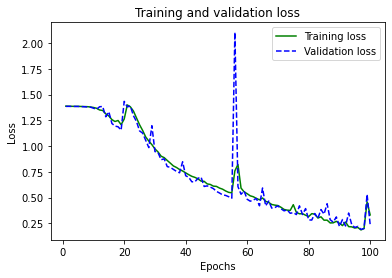

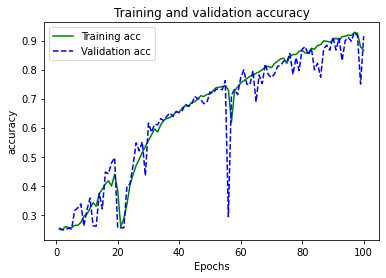

In [25]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='green', label='Training loss')
plt.plot(epochs, val_loss, color='blue', linestyle='dashed', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, acc, color='green', label='Training acc')
plt.plot(epochs, val_acc, color='blue', linestyle='dashed', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.legend()


In [26]:
score = model.evaluate(X_train , y_train, verbose=0)

print('Train loss:', score[0])
print('Train accuracy: ', score[1]*100.0 ,'%')

Train loss: 0.1597006469964981
Train accuracy:  95.02540230751038 %


In [27]:
score = model.evaluate(X_test , y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy: ', score[1]*100.0 ,'%')

Test loss: 0.4150298237800598
Test accuracy:  88.73239159584045 %
